Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/thread_ring/'

N = 1_000_000
R = 100_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 11:43:40 2025 +0100) (512.36ms ela...,7.52,0.0560,0.809,8.53,0.95,56.41,56.94 C,Nominal
1,(Sun Mar 23 11:43:41 2025 +0100) (506.10ms ela...,6.44,0.1030,0.878,7.20,0.90,45.12,56.94 C,Nominal
2,(Sun Mar 23 11:43:41 2025 +0100) (505.47ms ela...,2.54,0.1040,0.769,3.41,0.80,45.04,56.55 C,Nominal
3,(Sun Mar 23 11:43:42 2025 +0100) (508.78ms ela...,5.84,0.0447,0.754,6.64,1.03,58.15,56.55 C,Nominal
4,(Sun Mar 23 11:43:42 2025 +0100) (507.43ms ela...,1.30,0.0000,0.323,1.60,0.30,19.02,56.15 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(843, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 11:43:52 2025 +0100) (1008.06ms el...,37.7,0.0756,1.22,40.81,3.78,98.22,60.23 C,Nominal
1,(Sun Mar 23 11:43:53 2025 +0100) (1004.91ms el...,36.7,0.0749,1.28,40.22,3.86,97.71,63.25 C,Nominal
2,(Sun Mar 23 11:43:54 2025 +0100) (1005.61ms el...,36.0,0.0245,1.11,38.97,3.83,98.45,66.00 C,Nominal
3,(Sun Mar 23 11:43:55 2025 +0100) (1005.26ms el...,36.5,0.0000,1.41,39.86,3.94,98.95,68.00 C,Nominal
4,(Sun Mar 23 11:43:56 2025 +0100) (1004.44ms el...,34.1,0.0000,1.17,37.15,3.84,97.28,69.79 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 11:19:46 2025 +0100) (511.16ms ela...,1.060,0.0394,0.536,1.57,0.45,27.84,47.29 C,Nominal
1,(Sun Mar 23 11:19:47 2025 +0100) (506.61ms ela...,10.000,0.1390,1.190,11.29,1.29,66.17,47.29 C,Nominal
2,(Sun Mar 23 11:19:47 2025 +0100) (506.91ms ela...,5.290,0.0881,0.857,6.19,1.03,55.16,47.91 C,Nominal
3,(Sun Mar 23 11:19:48 2025 +0100) (508.00ms ela...,0.766,0.0493,0.551,1.43,0.56,34.92,47.91 C,Nominal
4,(Sun Mar 23 11:19:48 2025 +0100) (508.90ms ela...,0.246,0.0000,0.295,0.50,0.17,10.77,47.84 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(1027, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 11:19:58 2025 +0100) (1009.69ms el...,21.4,0.0913,1.170,23.67,2.50,95.88,50.43 C,Nominal
1,(Sun Mar 23 11:19:59 2025 +0100) (1006.10ms el...,16.7,0.0703,0.904,19.59,2.00,96.41,52.03 C,Nominal
2,(Sun Mar 23 11:20:00 2025 +0100) (1004.97ms el...,23.5,0.0213,0.839,26.01,3.03,95.94,54.88 C,Nominal
3,(Sun Mar 23 11:20:01 2025 +0100) (1005.02ms el...,21.4,0.0000,0.972,24.24,2.65,96.87,56.92 C,Nominal
4,(Sun Mar 23 11:20:02 2025 +0100) (1006.60ms el...,10.0,0.0000,1.190,13.04,1.03,99.02,57.70 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 11:43:40,7.52,0.0560,0.809,8.53,0.95,56.41,56.94,Nominal,512.36
1,2025-03-23 11:43:41,6.44,0.1030,0.878,7.20,0.90,45.12,56.94,Nominal,506.10
2,2025-03-23 11:43:41,2.54,0.1040,0.769,3.41,0.80,45.04,56.55,Nominal,505.47
3,2025-03-23 11:43:42,5.84,0.0447,0.754,6.64,1.03,58.15,56.55,Nominal,508.78
4,2025-03-23 11:43:42,1.30,0.0000,0.323,1.60,0.30,19.02,56.15,Nominal,507.43


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(843, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 11:43:52,37.7,0.0756,1.22,40.81,3.78,98.22,60.23,Nominal,1008.06
1,2025-03-23 11:43:53,36.7,0.0749,1.28,40.22,3.86,97.71,63.25,Nominal,1004.91
2,2025-03-23 11:43:54,36.0,0.0245,1.11,38.97,3.83,98.45,66.00,Nominal,1005.61
3,2025-03-23 11:43:55,36.5,0.0000,1.41,39.86,3.94,98.95,68.00,Nominal,1005.26
4,2025-03-23 11:43:56,34.1,0.0000,1.17,37.15,3.84,97.28,69.79,Nominal,1004.44


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 11:19:46,1.060,0.0394,0.536,1.57,0.45,27.84,47.29,Nominal,511.16
1,2025-03-23 11:19:47,10.000,0.1390,1.190,11.29,1.29,66.17,47.29,Nominal,506.61
2,2025-03-23 11:19:47,5.290,0.0881,0.857,6.19,1.03,55.16,47.91,Nominal,506.91
3,2025-03-23 11:19:48,0.766,0.0493,0.551,1.43,0.56,34.92,47.91,Nominal,508.00
4,2025-03-23 11:19:48,0.246,0.0000,0.295,0.50,0.17,10.77,47.84,Nominal,508.90


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(1027, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 11:19:58,21.4,0.0913,1.170,23.67,2.50,95.88,50.43,Nominal,1009.69
1,2025-03-23 11:19:59,16.7,0.0703,0.904,19.59,2.00,96.41,52.03,Nominal,1006.10
2,2025-03-23 11:20:00,23.5,0.0213,0.839,26.01,3.03,95.94,54.88,Nominal,1004.97
3,2025-03-23 11:20:01,21.4,0.0000,0.972,24.24,2.65,96.87,56.92,Nominal,1005.02
4,2025-03-23 11:20:02,10.0,0.0000,1.190,13.04,1.03,99.02,57.70,Nominal,1006.60


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


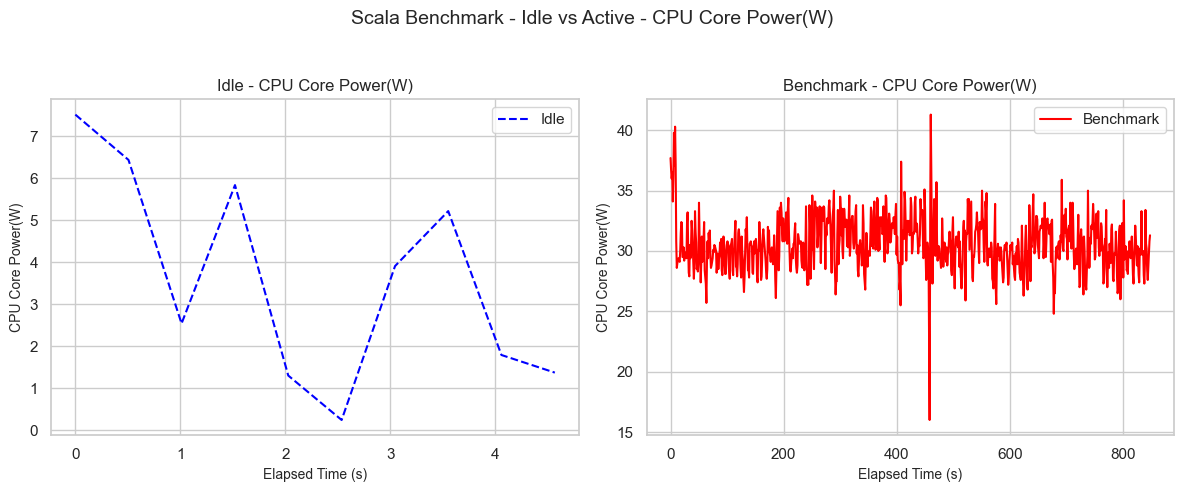

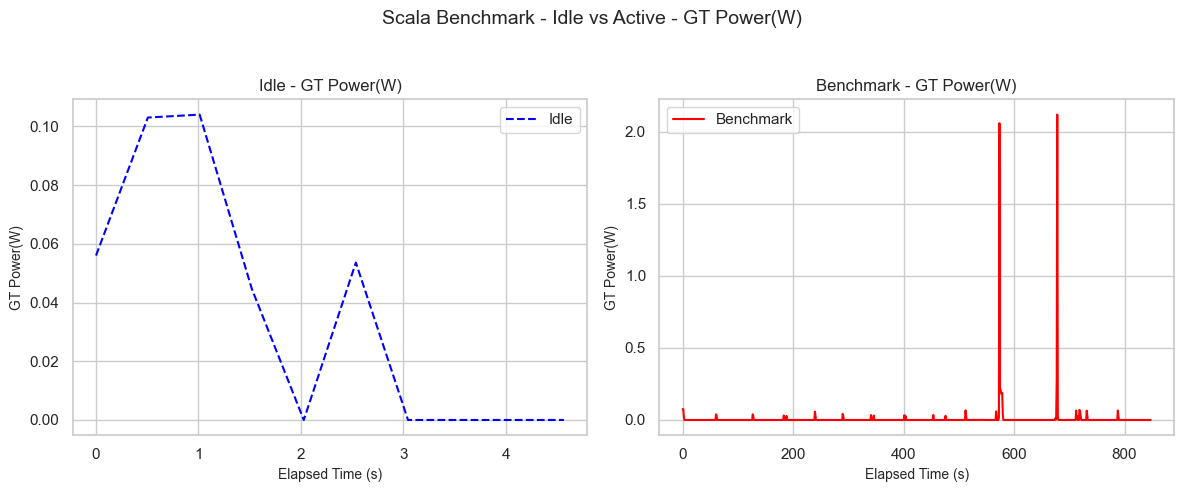

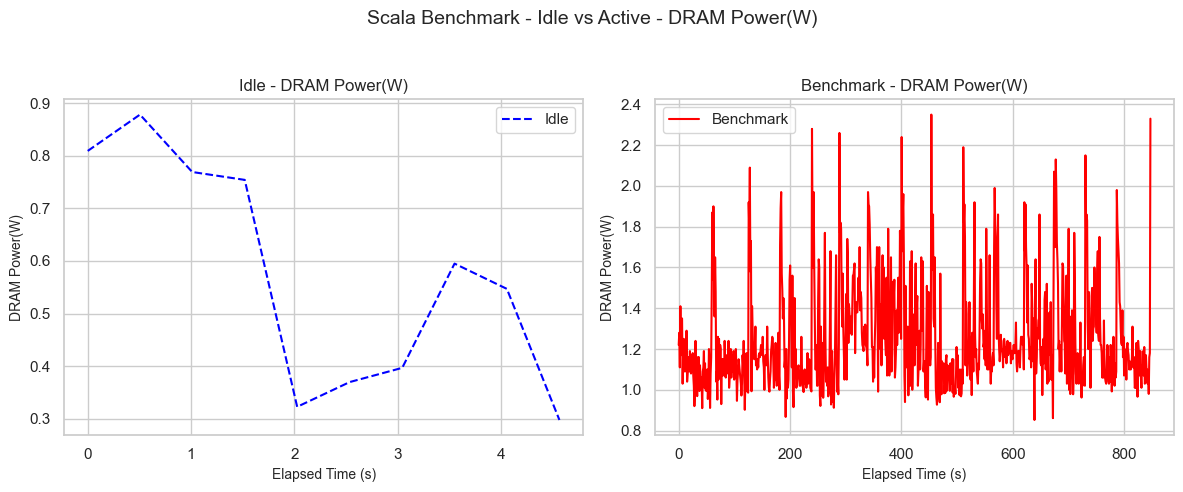

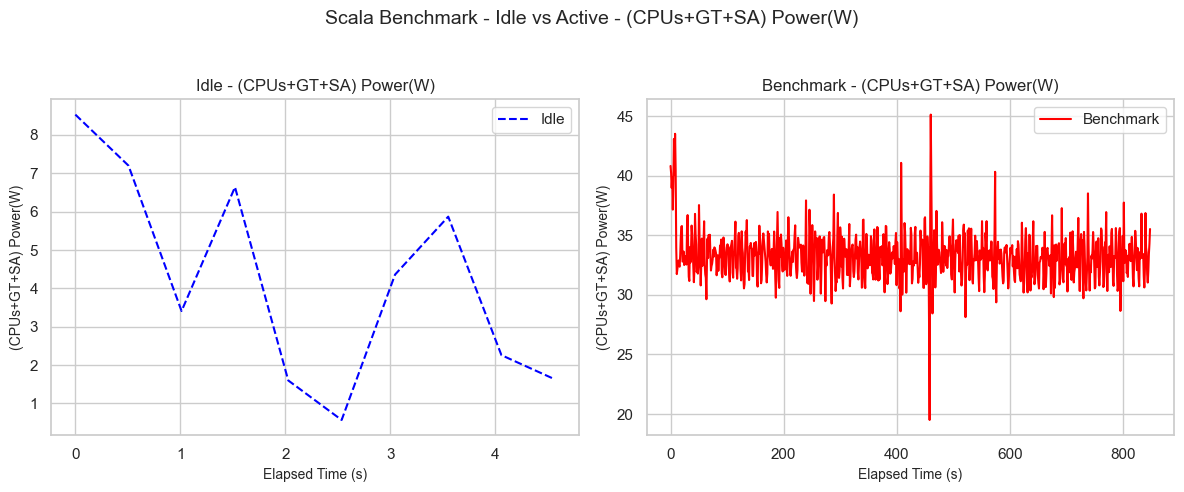

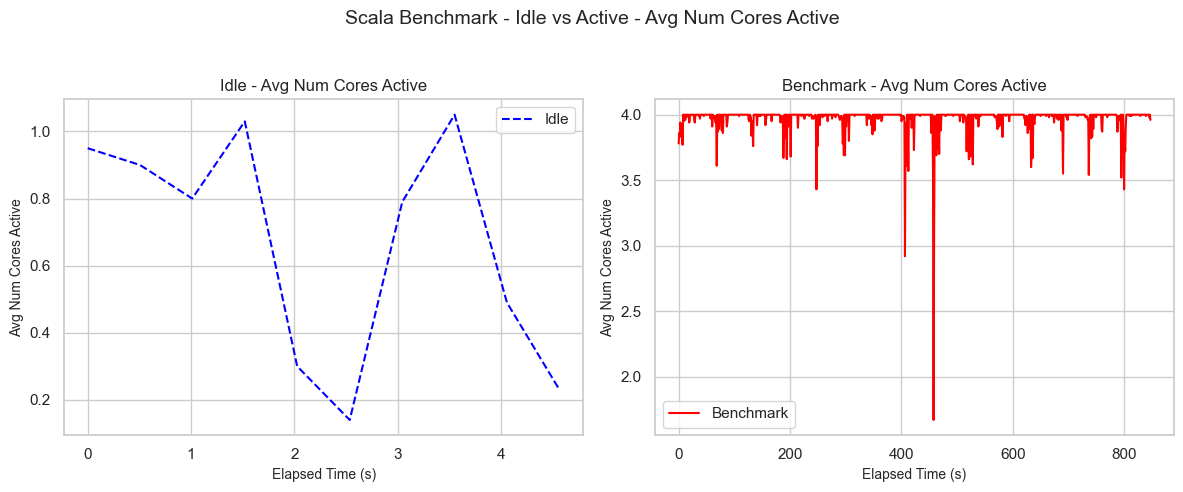

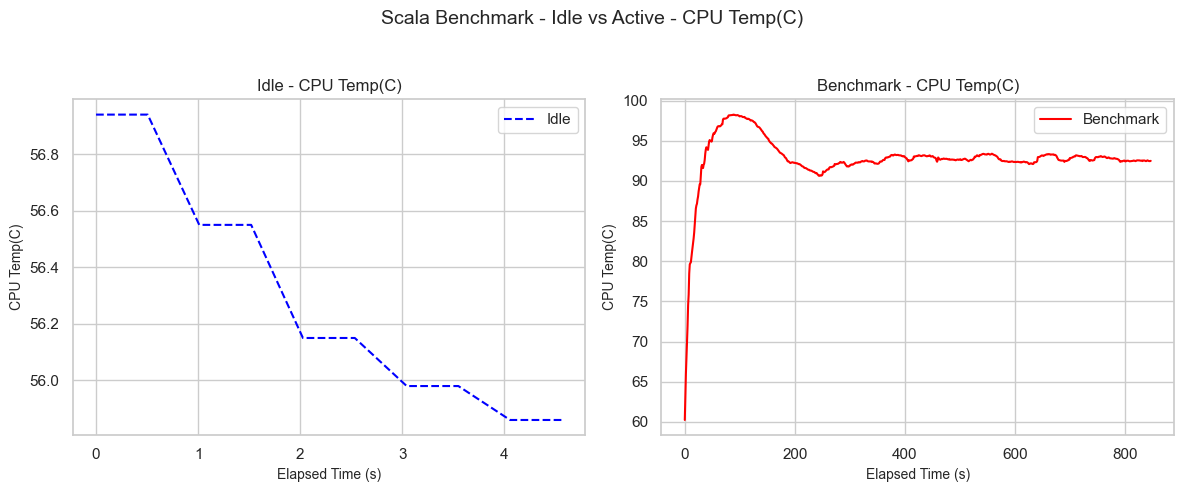

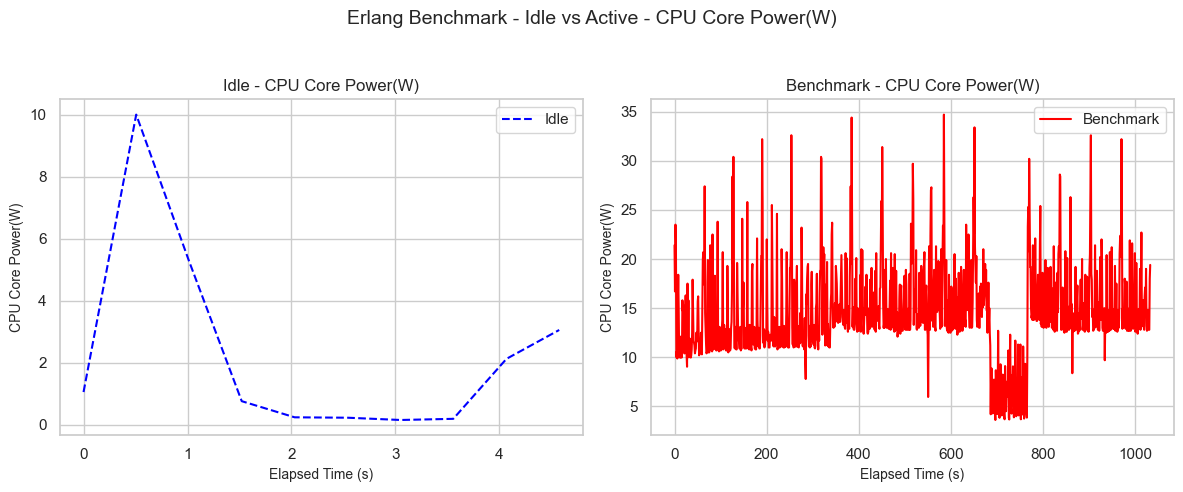

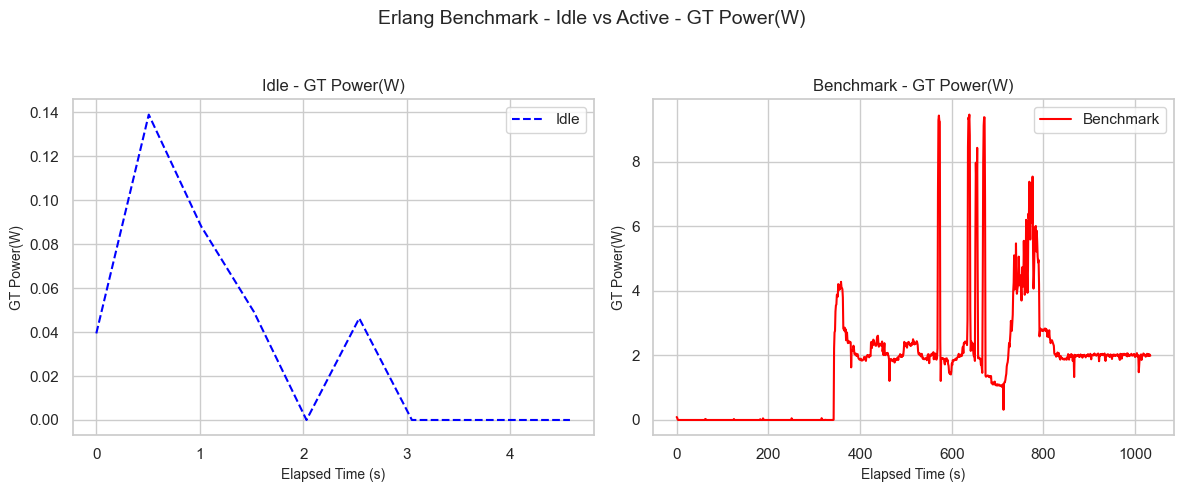

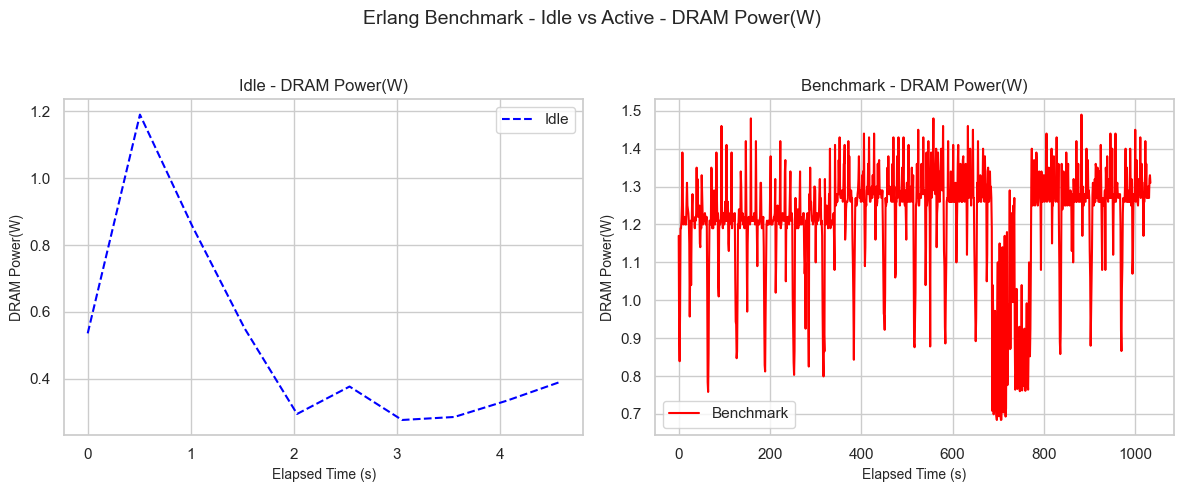

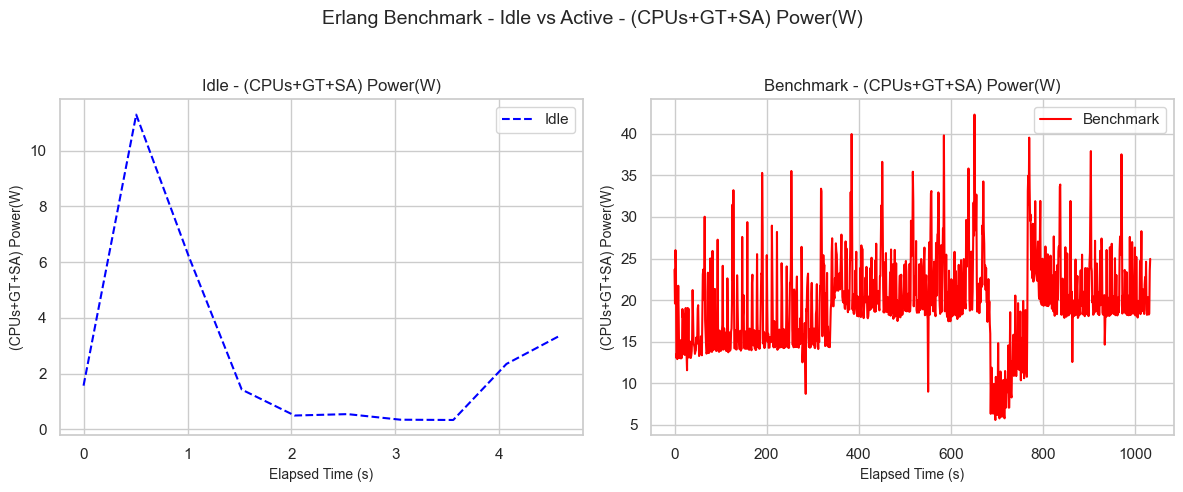

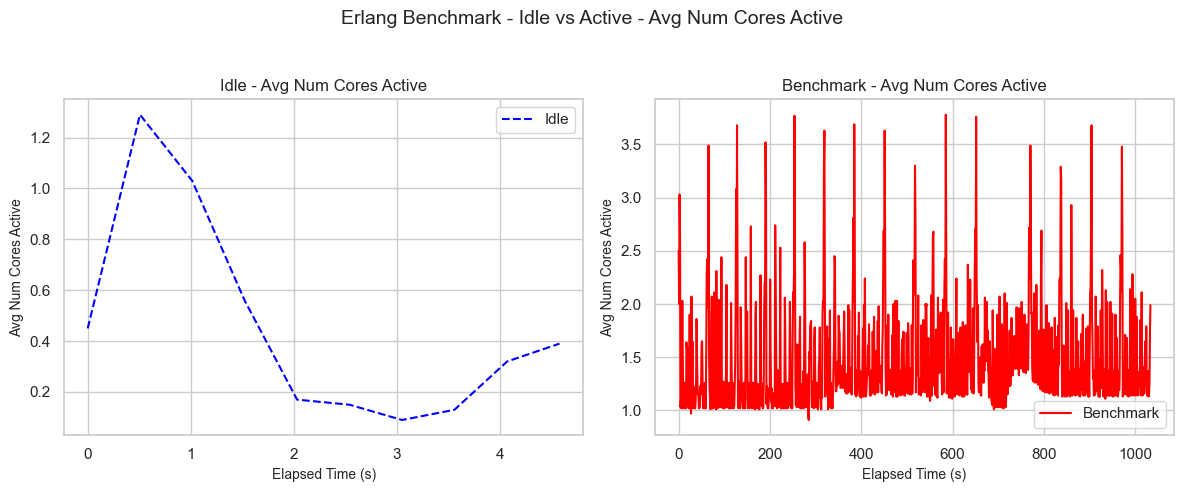

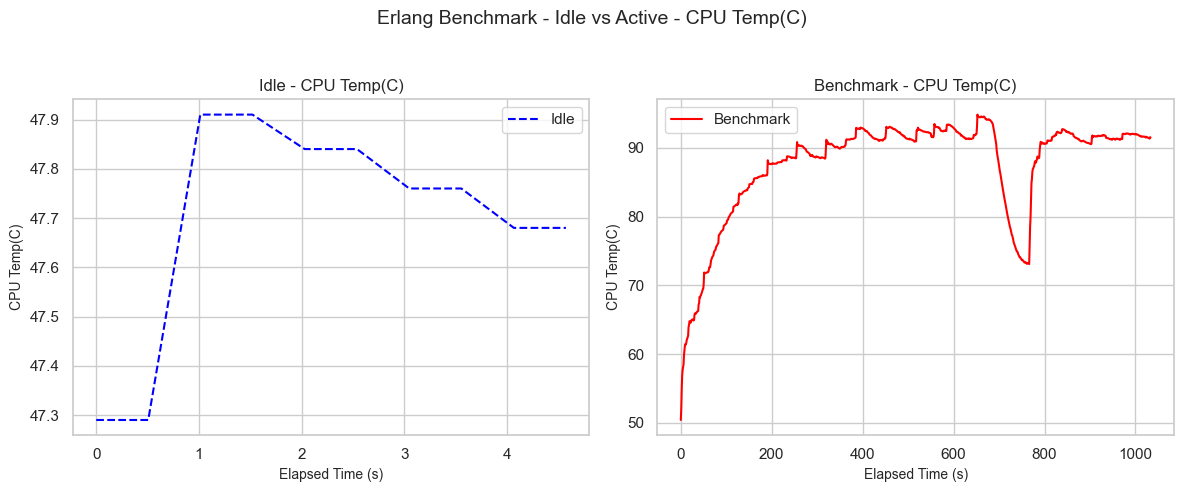

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

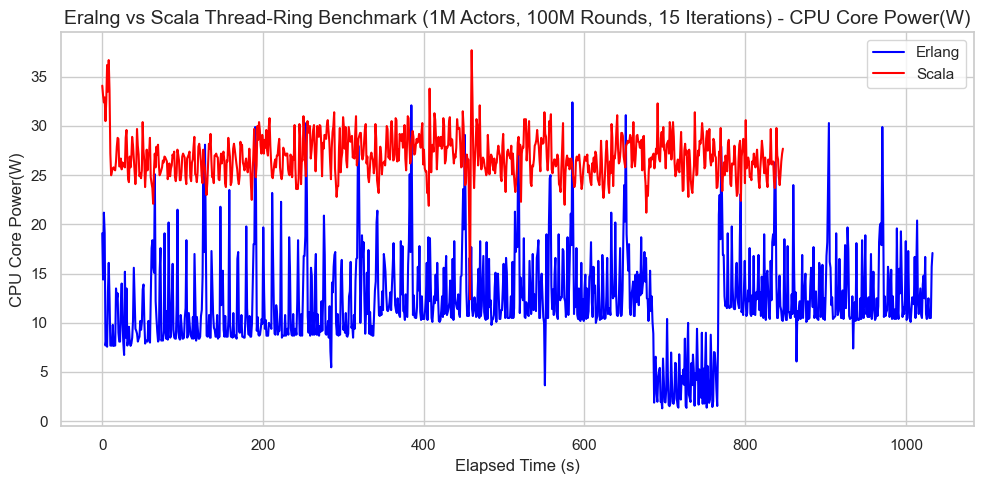

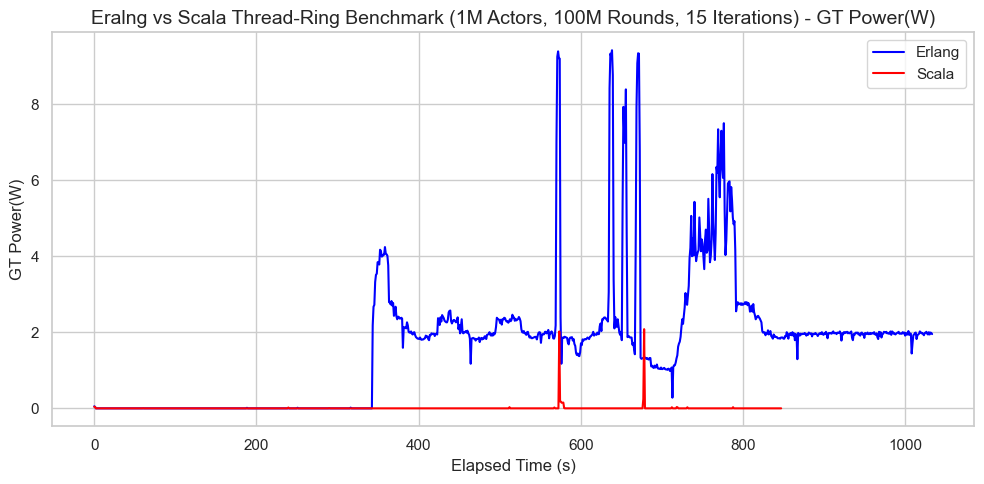

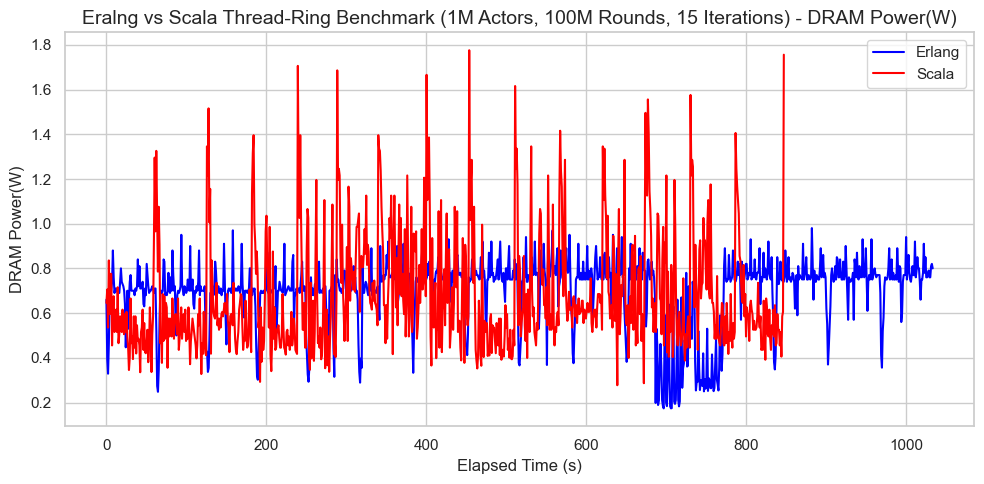

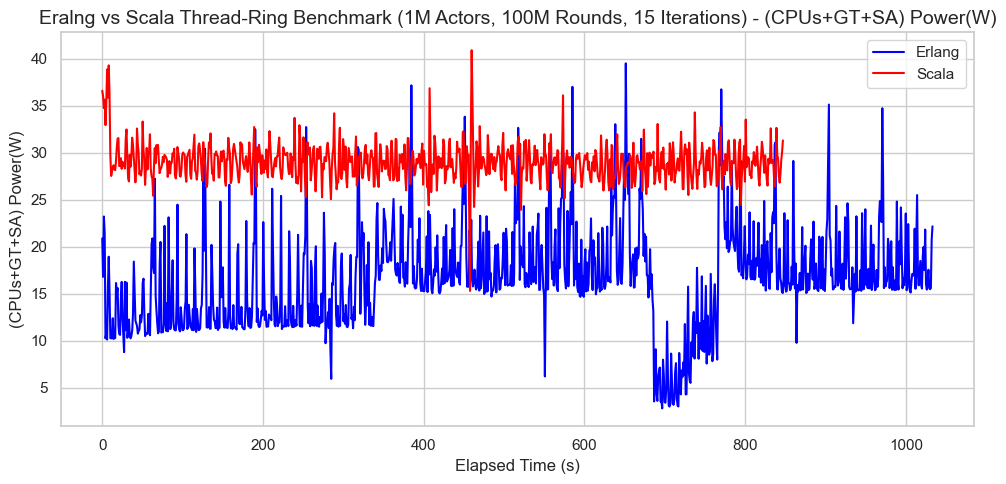

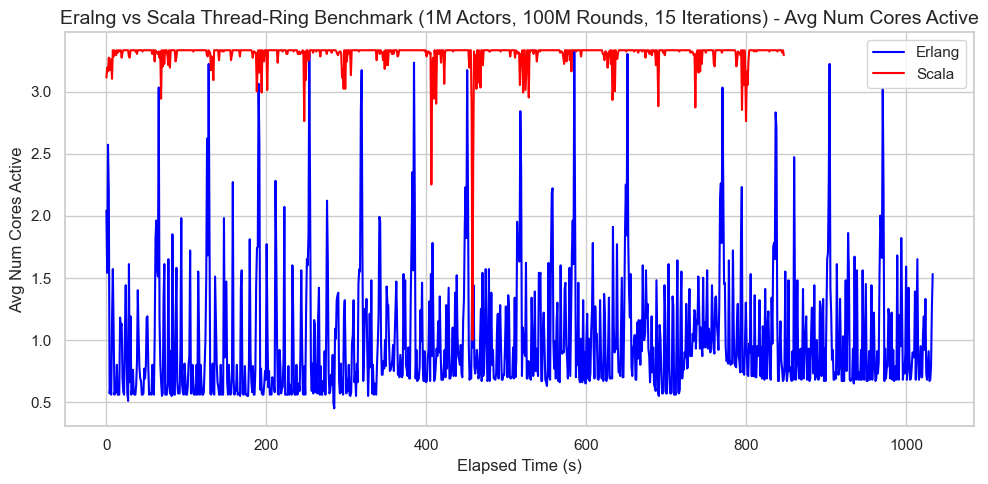

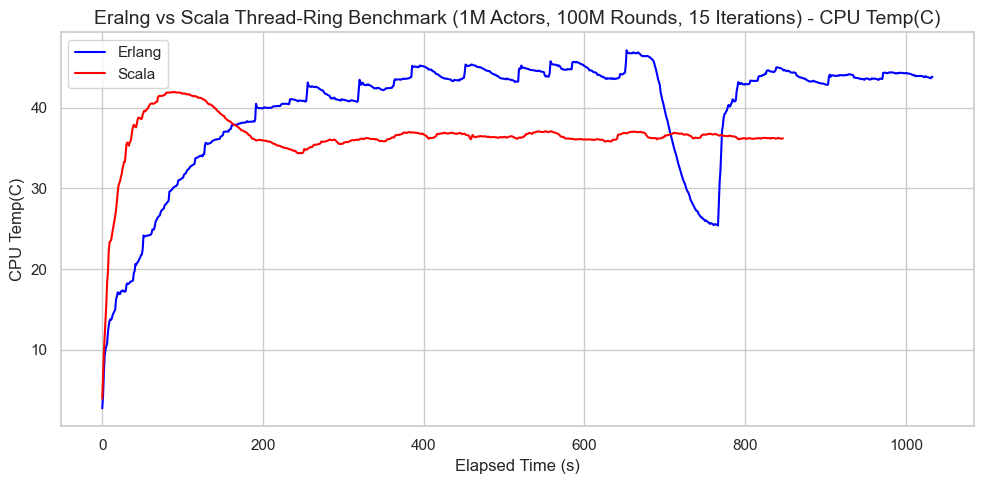

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        26.937586
GT Power(W)              -0.027931
DRAM Power(W)             0.677711
(CPUs+GT+SA) Power(W)    29.015752
CPU Temp(C)              36.487630
Avg Num Cores Active      3.301051
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        12.145469
GT Power(W)               1.639329
DRAM Power(W)             0.701864
(CPUs+GT+SA) Power(W)    16.637182
CPU Temp(C)              39.814389
Avg Num Cores Active      1.003412
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 24606.553499522648 Joules
Erlang Benchmark: 17206.021480786854 Joules
